In [2]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd
from format import format_data_frame

df = pd.read_csv(f"./data/TG_STAID002759.txt",
                 header=14, index_col=1, parse_dates=True)

df = format_data_frame(df, first_date=1946)

y= df['temp_c']
y


time_step
0        -2.4
1        -3.5
2        -4.5
3       -12.7
4       -15.0
         ... 
27662    13.6
27663    11.2
27664     9.4
27665     9.6
27666    10.7
Name: temp_c, Length: 27667, dtype: float64

In [3]:
# Create Training and Test
size = int(len(y) * 0.66)
train, test = y[0:size], y[size:len(y)]

In [4]:
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.976971
p-value: 0.000000


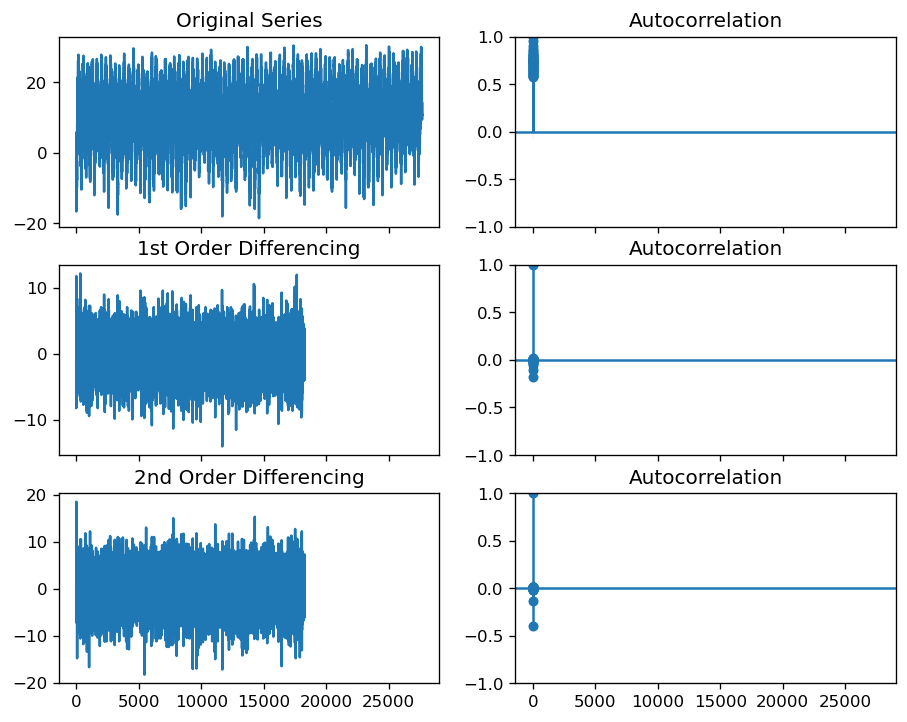

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})



# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')  # type: ignore
plot_acf(train, ax=axes[0, 1])  # type: ignore

# 1st Differencing
axes[1, 0].plot(train.diff()); axes[1, 0].set_title('1st Order Differencing')  # type: ignore
plot_acf(train.diff().dropna(), ax=axes[1, 1])  # type: ignore

# 2nd Differencing
axes[2, 0].plot(train.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')  # type: ignore
plot_acf(train.diff().diff().dropna(), ax=axes[2, 1])  # type: ignore

plt.show()

/Users/earyzhe/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


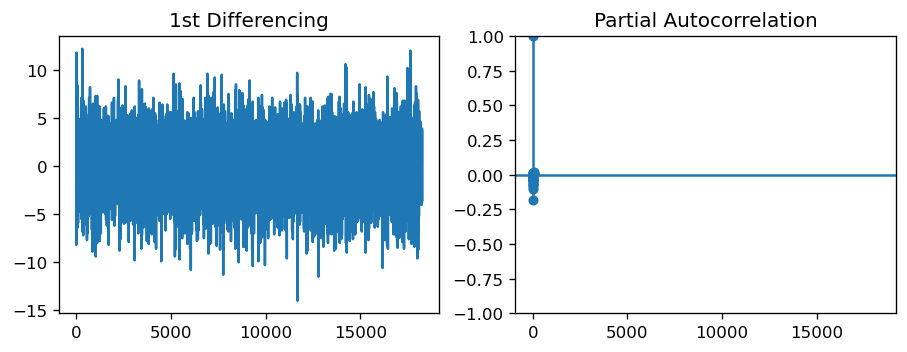

In [6]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.diff()); axes[0].set_title('1st Differencing')  # type: ignore
axes[1].set(ylim=(0,5)) # type: ignore
plot_pacf(train.diff().dropna(), ax=axes[1]) # type: ignore

plt.show()

## What is the difference between Sarimax and ARIMA?
SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model. ARIMA includes an autoregressive integrated moving average, while SARIMAX includes seasonal effects and eXogenous factors with the autoregressive and moving average component in the model.

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(y, order=(1,1,2))
# model_fit = model.fit(disp=0)
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 temp_c   No. Observations:                27667
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -62131.474
Date:                Wed, 18 Jan 2023   AIC                         124270.948
Time:                        09:13:45   BIC                         124303.860
Sample:                             0   HQIC                        124281.549
                              - 27667                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6101      0.011     57.025      0.000       0.589       0.631
ma.L1         -0.6301      0.011    -57.152      0.000      -0.652      -0.608
ma.L2         -0.2210      0.007    -33.760      0.0

In [8]:
# 1,1,1 ARIMA Model
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 temp_c   No. Observations:                27667
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -62564.244
Date:                Wed, 18 Jan 2023   AIC                         125134.489
Time:                        09:13:49   BIC                         125159.173
Sample:                             0   HQIC                        125142.440
                              - 27667                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7657      0.008     99.936      0.000       0.751       0.781
ma.L1         -0.9149      0.005   -190.389      0.000      -0.924      -0.905
sigma2         5.3921      0.041    132.911      0.0

AttributeError: 'function' object has no attribute 'plot'

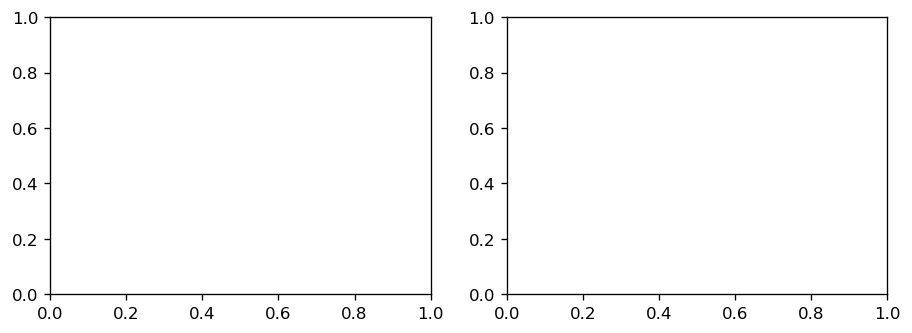

In [9]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.rolling.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
import plotly as pt


pt.plot(y.rolling(1000).mean(), 'line')

NameError: name 'y' is not defined

In [ ]:

# Forecast
fc = model_fit.forecast(15, alpha=0.05)  # 95% conf
fc


27667    11.076225
27668    11.364308
27669    11.584900
27670    11.753812
27671    11.883152
27672    11.982190
27673    12.058025
27674    12.116094
27675    12.160559
27676    12.194607
27677    12.220678
27678    12.240641
27679    12.255927
27680    12.267632
27681    12.276595
Name: predicted_mean, dtype: float64

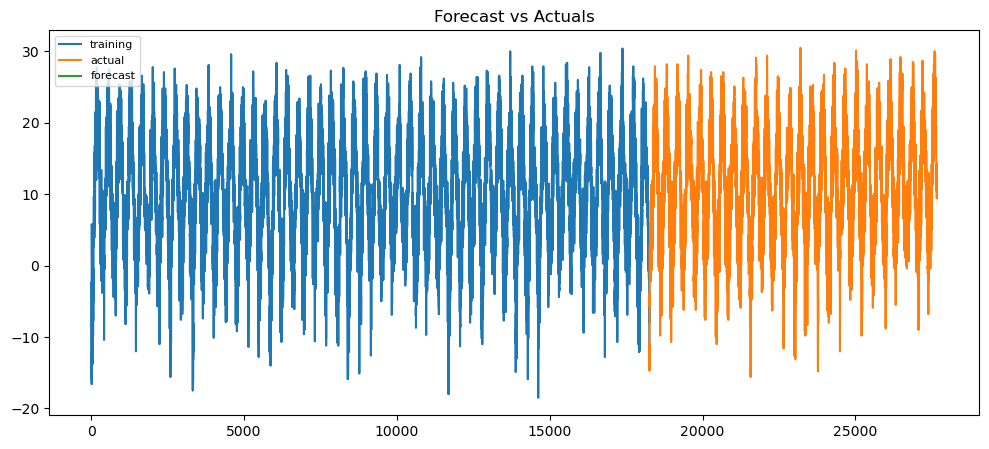

In [ ]:

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
import plotly.express as px 

fig = px.line(df, x='Time step', y='Temp C')

pt.plot(train, 'line')
fig = px.line(df, x='Date', y='AAPL.High')


# Plot 
fig = px.line(df, x='Date', y='AAPL.High')

# Only thing I figured is - I could do this 
fig.add_scatter(x=df['Date'], y=df['AAPL.Low'], mode='lines')

# Show plot 
fig.show()
